In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("athlete_events.csv")
region_df = pd.read_csv("noc_regions.csv")

In [3]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [4]:
df.shape

(271116, 15)

In [5]:
df = df[df['Season']=='Summer']

In [6]:
df.shape

(222552, 15)

In [7]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
271106  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
271107  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
271108  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
271109  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
271110  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
271106      Argentina  ARG  2004 Summer  2004  Summer          Athina   
271107  United States  USA  1972 Summer  1972  Summer          Munich   
271108         Russia  RUS  2000 Summer  2000  Summer          Sydney   
271109         Russia  RUS  2004 Summer  2004  Summer          Athina   
271110        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal  
271106      Hockey                     Hockey Men's Hockey   NaN  
271107    Football                 Football Men's Football   NaN  
271108      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271109      Rowing  Rowing Men's Lightweight Coxless Fours   NaN  
271110  Basketball           Basketball Women's Basketball   NaN

In [8]:
region_df.tail()

NOC    region        notes
225  YEM     Yemen          NaN
226  YMD     Yemen  South Yemen
227  YUG    Serbia   Yugoslavia
228  ZAM    Zambia          NaN
229  ZIM  Zimbabwe          NaN

In [9]:
df = df.merge(region_df,on='NOC',how='left')

In [10]:
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [11]:
df['region'].unique().shape

(206,)

In [12]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [13]:
df.duplicated().sum()

1385

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [17]:
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [18]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

C:\Users\GOURAB\AppData\Local\Temp\ipykernel_22060\2935417600.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()


NOC  Gold  Silver  Bronze
0    USA  2472    1333    1197
1    URS   832     635     596
2    GBR   635     729     620
3    GER   592     538     649
4    ITA   518     474     454
..   ...   ...     ...     ...
225  AHO     0       1       0
226  LBR     0       0       0
227  LCA     0       0       0
228  LES     0       0       0
229  LBA     0       0       0

[230 rows x 4 columns]

In [19]:
medal_tally=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])

In [20]:
medal_tally

ID                                 Name Sex   Age  Height  Weight  \
0            1                            A Dijiang   M  24.0   180.0    80.0   
1            2                             A Lamusi   M  23.0   170.0    60.0   
2            3                  Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                 Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8   Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                  ...  ..   ...     ...     ...   
222528  135553  Galina Ivanovna Zybina (-Fyodorova)   F  25.0   168.0    80.0   
222530  135553  Galina Ivanovna Zybina (-Fyodorova)   F  33.0   168.0    80.0   
222536  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222537  135556           Bogusaw Stanisaw Zychowicz   M  19.0   189.0    80.0   
222541  135560                    Stavroula Zygouri   F  36.0   171.0    63.0   

                  Team  NOC        Games  Year  Season         City  \
0                China  CHN  1992 Summer  1992  Summer    Barcelona   
1                China  CHN  2012 Summer  2012  Summer       London   
2              Denmark  DEN  1920 Summer  1920  Summer    Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris   
4          Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   
...                ...  ...          ...   ...     ...          ...   
222528    Soviet Union  URS  1956 Summer  1956  Summer    Melbourne   
222530    Soviet Union  URS  1964 Summer  1964  Summer        Tokyo   
222536          Poland  POL  1980 Summer  1980  Summer       Moskva   
222537          Poland  POL  1980 Summer  1980  Summer       Moskva   
222541          Greece  GRE  2004 Summer  2004  Summer       Athina   

             Sport                                      Event   Medal  \
0       Basketball                Basketball Men's Basketball     NaN   
1             Judo               Judo Men's Extra-Lightweight     NaN   
2         Football                    Football Men's Football     NaN   
3       Tug-Of-War                Tug-Of-War Men's Tug-Of-War    Gold   
4        Athletics               Athletics Women's 100 metres     NaN   
...            ...                                        ...     ...   
222528   Athletics                 Athletics Women's Shot Put  Silver   
222530   Athletics                 Athletics Women's Shot Put  Bronze   
222536    Swimming        Swimming Men's 100 metres Butterfly     NaN   
222537    Swimming        Swimming Men's 200 metres Butterfly     NaN   
222541   Wrestling  Wrestling Women's Middleweight, Freestyle     NaN   

             region notes  Bronze  Gold  Silver  
0             China   NaN       0     0       0  
1             China   NaN       0     0       0  
2           Denmark   NaN       0     0       0  
3           Denmark   NaN       0     1       0  
4       Netherlands   NaN       0     0       0  
...             ...   ...     ...   ...     ...  
222528       Russia   NaN       0     0       1  
222530       Russia   NaN       1     0       0  
222536       Poland   NaN       0     0       0  
222537       Poland   NaN       0     0       0  
222541       Greece   NaN       0     0       0  

[105636 rows x 20 columns]

In [21]:
medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

C:\Users\GOURAB\AppData\Local\Temp\ipykernel_22060\3496508320.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  medal_tally = medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()


In [22]:
medal_tally['total'] = medal_tally['Gold']+medal_tally['Silver']+medal_tally['Bronze']

In [23]:
medal_tally

region  Gold  Silver  Bronze  total
0              USA  1035     802     708   2545
1           Russia   592     498     487   1577
2          Germany   444     457     491   1392
3               UK   278     317     300    895
4           France   234     256     287    777
..             ...   ...     ...     ...    ...
200        Lesotho     0       0       0      0
201        Albania     0       0       0      0
202          Libya     0       0       0      0
203  Liechtenstein     0       0       0      0
204        Liberia     0       0       0      0

[205 rows x 5 columns]

In [24]:
years = df['Year'].unique().tolist()

In [25]:
years.sort()

In [26]:
years.insert(0,'Overall')

In [27]:
country = df['region'].unique().tolist()

In [28]:
country = np.unique(df['region'].dropna().values).tolist()

In [29]:
country.sort()

In [30]:
country.insert(0,'Overall')

In [31]:
def fetch_meal_tally(df,year,country):
    medal_df=df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'])
    flag=0
    if year=='Overall' and country=='Overall':
        temp_df = medal_df
    if year=='Overall' and country !='Overall':
        flag=1
        temp_df = medal_df[medal_df['region']== country]
    if year!='Overall' and country =='Overall':
        temp_df = medal_df[medal_df['Year']==year]
    if year!='Overall' and country !='Overall':
        temp_df = medal_df[(medal_df['Year']==year) & (medal_df['region']==country)]
    if flag==1:
        x=temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x=temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['total']=x['Gold']+x['Silver']+x['Bronze']
    print(x)

In [32]:
df['Year'].unique().shape[0]-1

28

In [33]:
df['City'].unique().shape[0]

23

In [34]:
df['Sport'].unique().shape[0]

52

In [35]:
df['Event'].unique().shape[0]

651

In [36]:
df['region'].unique().shape[0]

206

In [37]:
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [38]:
import plotly.express as ps

In [39]:
nations_over_time.rename(columns={'index':'Edition','Year':'No of Countries'}, inplace=True)

In [40]:
fig = ps.line(nations_over_time,x="Edition",y="No of Countries")
fig.show()

In [41]:
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('index')

index  Year
28   1896    43
26   1900    90
25   1904    95
27   1906    74
23   1908   109
24   1912   107
14   1920   158
20   1924   131
22   1928   122
21   1932   131
18   1936   150
15   1948   153
19   1952   149
16   1956   151
17   1960   150
13   1964   163
12   1968   172
11   1972   193
10   1976   198
9    1980   203
8    1984   221
7    1988   237
6    1992   257
5    1996   271
4    2000   300
3    2004   301
1    2008   302
2    2012   302
0    2016   306

In [42]:
x = df.drop_duplicates(['Year','Sport','Event'])

<AxesSubplot: xlabel='Year', ylabel='Sport'>

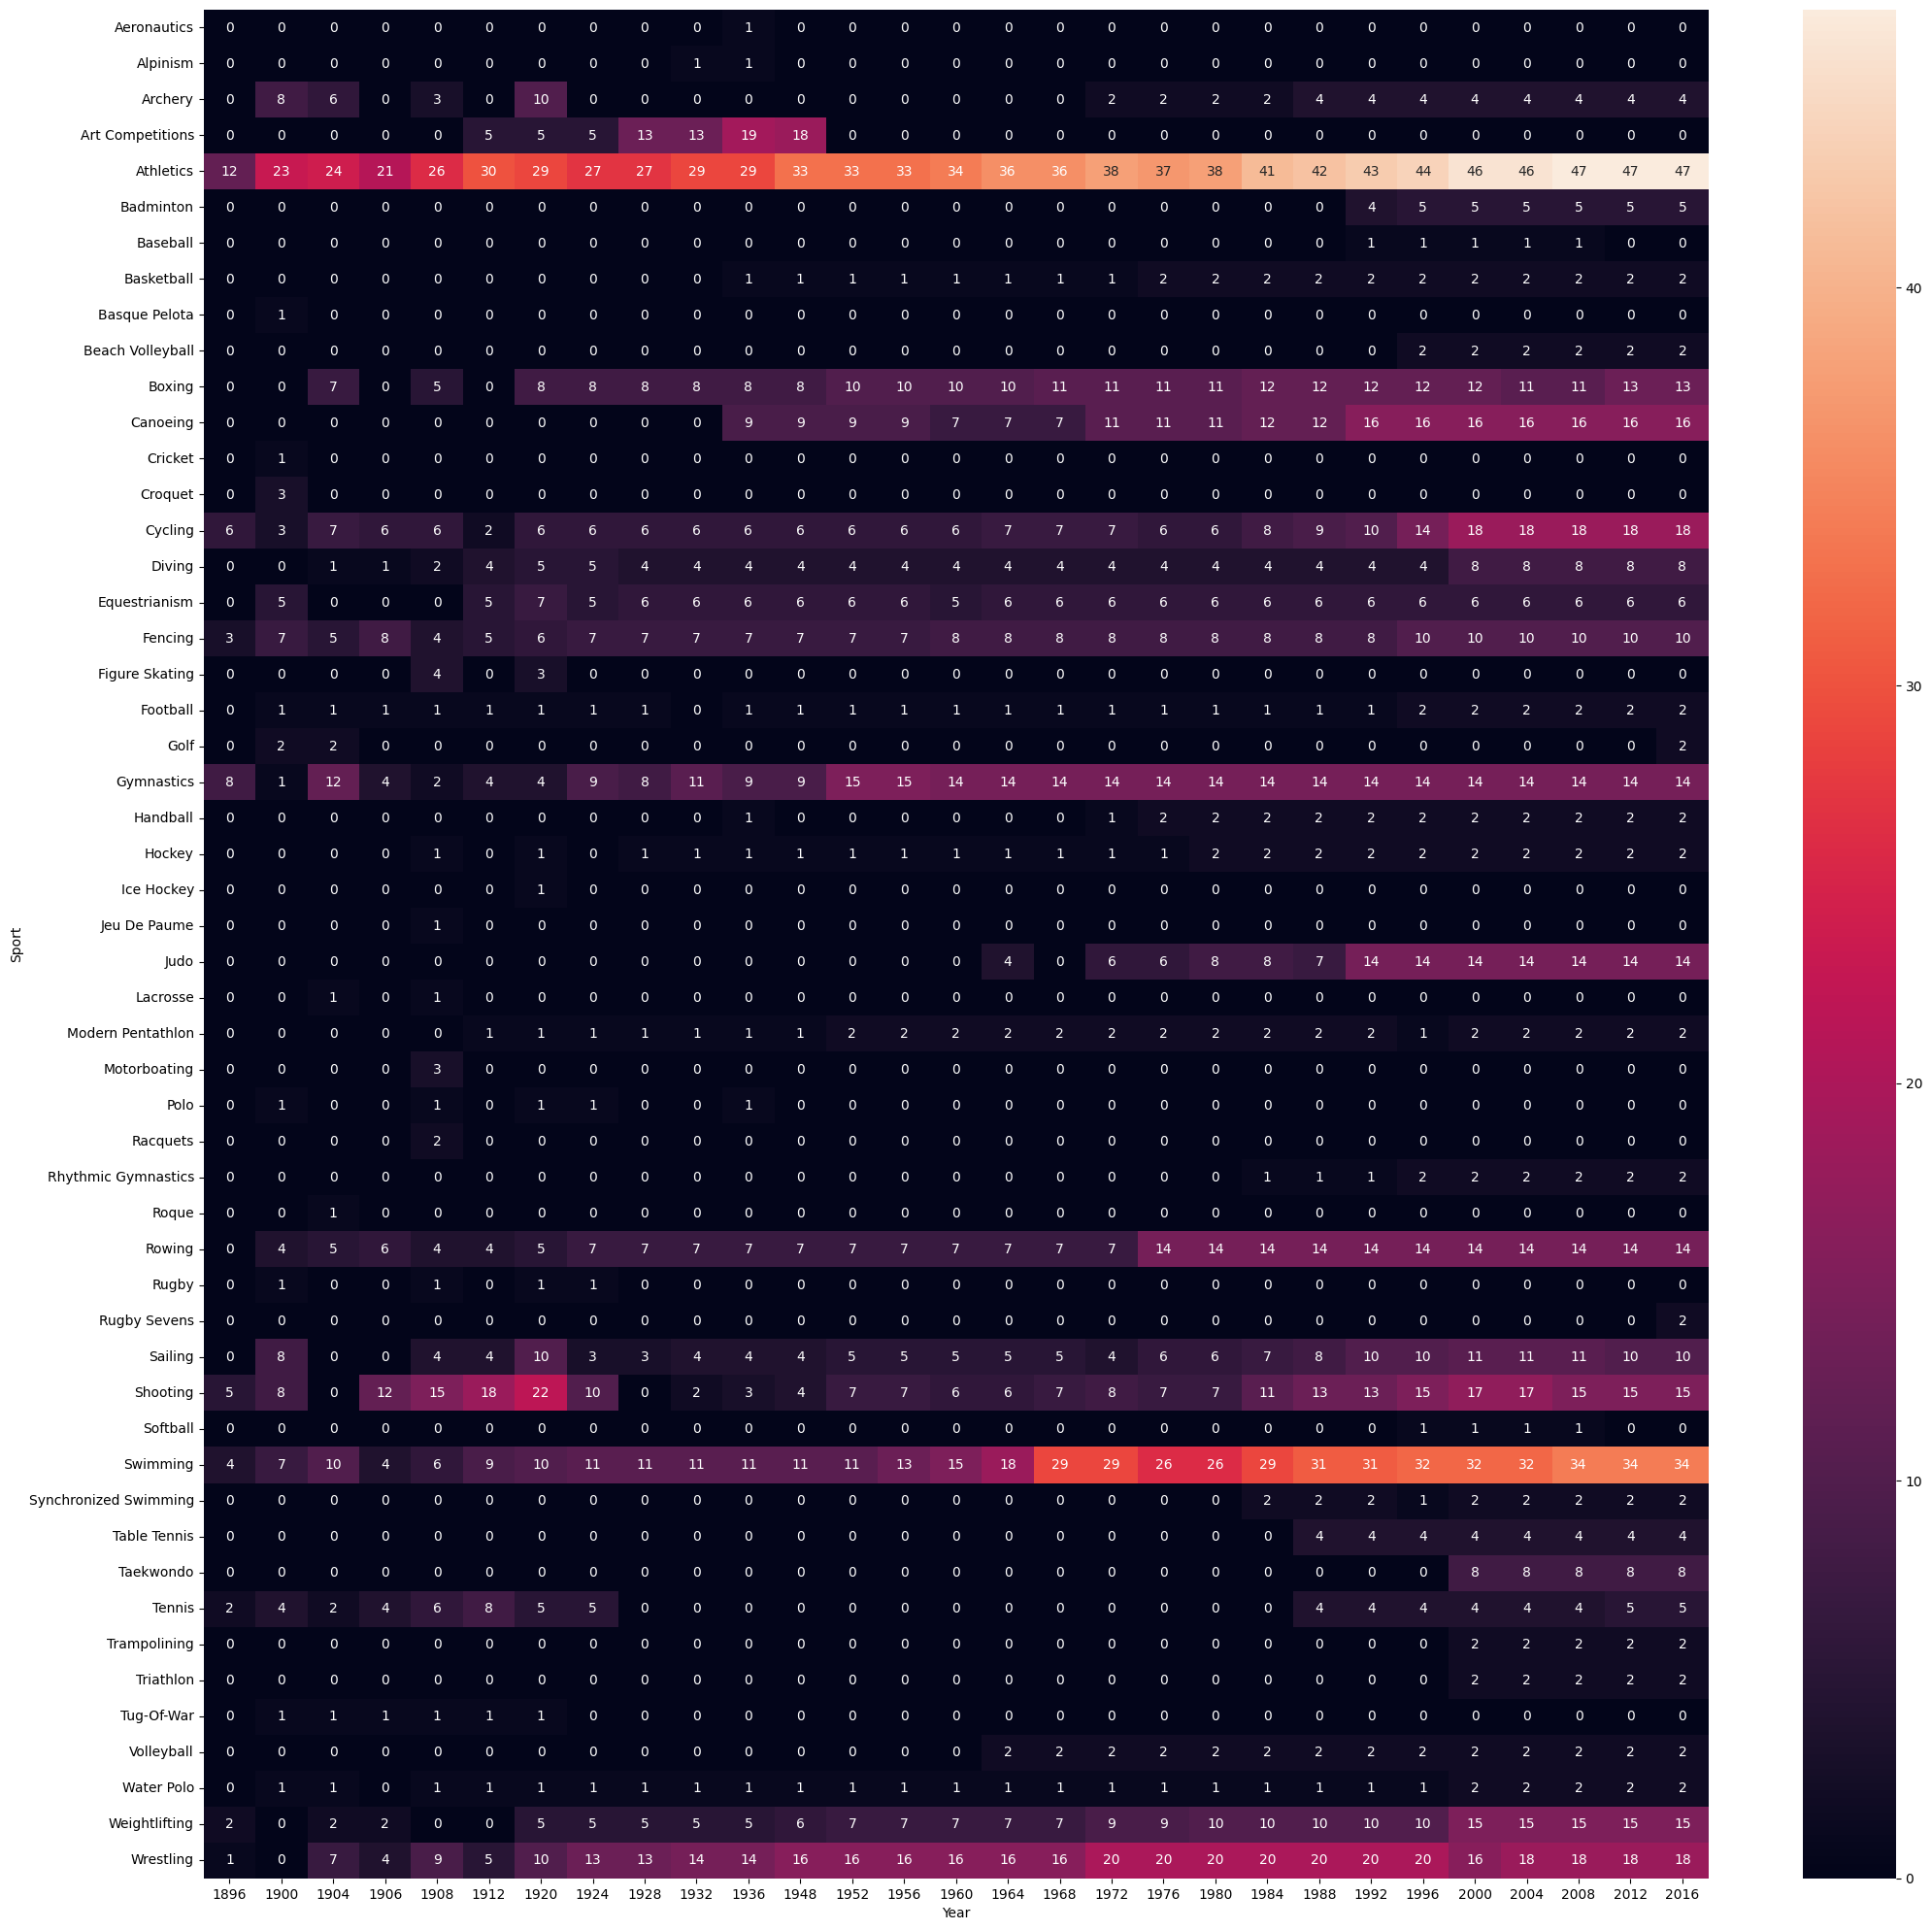

In [43]:
plt.figure(figsize=(25,25))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

In [44]:
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])
    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport']== sport]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Madels'},inplace=True)
    return x

In [45]:
most_successful(df,'Swimming')

Name  Madels     Sport  \
0                            Michael Fred Phelps, II      28  Swimming   
30   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12  Swimming   
47              Dara Grace Torres (-Hoffman, -Minas)      12  Swimming   
60                                Ryan Steven Lochte      12  Swimming   
74                     Natalie Anne Coughlin (-Hall)      12  Swimming   
86                    Matthew Nicholas "Matt" Biondi      11  Swimming   
98                                 Mark Andrew Spitz      11  Swimming   
110                             Gary Wayne Hall, Jr.      10  Swimming   
120                            Franziska van Almsick      10  Swimming   
143                        Shirley Frances Babashoff       9  Swimming   
154                                 Ian James Thorpe       9  Swimming   
164                               Leisel Marie Jones       9  Swimming   
174                    Aleksandr Vladimirovich Popov       9  Swimming   
189                         Zoltn Imre dn von Halmay       9  Swimming   
198                  Donald Arthur "Don" Schollander       8  Swimming   

        region  
0          USA  
30         USA  
47         USA  
60         USA  
74         USA  
86         USA  
98         USA  
110        USA  
120    Germany  
143        USA  
154  Australia  
164  Australia  
174     Russia  
189    Hungary  
198        USA

In [46]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'], inplace=True)

C:\Users\GOURAB\AppData\Local\Temp\ipykernel_22060\3339435951.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
new_df = temp_df[temp_df['region']=='USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [48]:
fig = ps.line(final_df,x="Year",y="Medal")
fig.show()

<AxesSubplot: xlabel='Year', ylabel='Sport'>

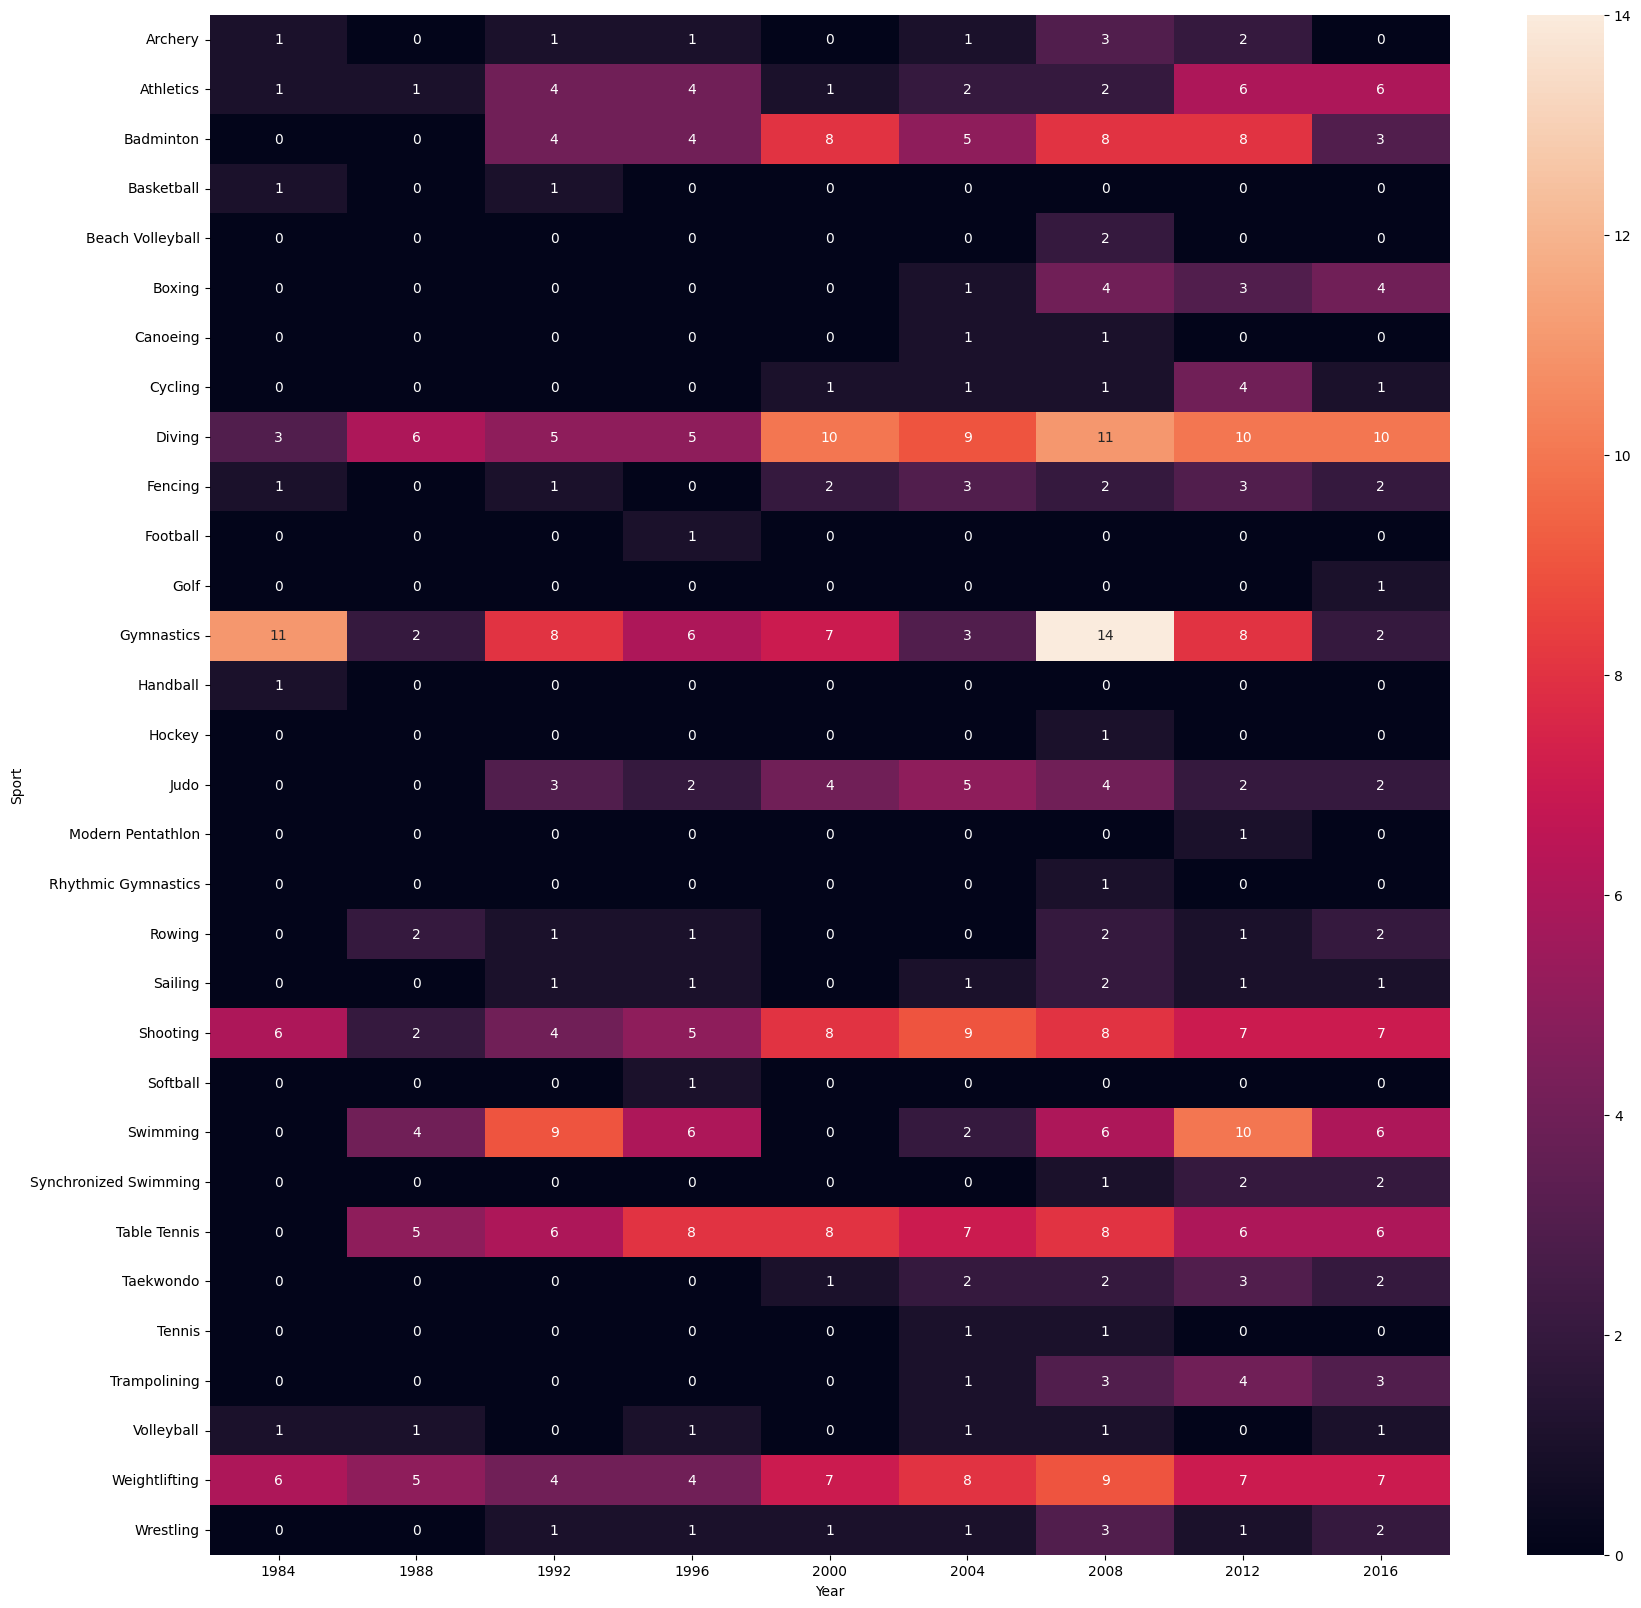

In [49]:
plt.figure(figsize=(20,20))
new_df = temp_df[temp_df['region']=='China']
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int'),annot=True)

In [50]:
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region']== country]
    x= temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Madels'},inplace=True)
    return x

In [51]:
most_successful(df,'Jamaica')

Name  Madels      Sport
0           Merlene Joyce Ottey-Page       9  Athletics
19   Veronica Angella Campbell-Brown       8  Athletics
30                Usain St. Leo Bolt       8  Athletics
40           Shelly-Ann Fraser-Pryce       6  Athletics
47     Donald O'Reilly "Don" Quarrie       4  Athletics
56     Herbert Henry "Herb" McKenley       4  Athletics
62               Arthur Stanley Wint       4  Athletics
68    Novlene Hilaire Williams-Mills       4  Athletics
75                       Yohan Blake       4  Athletics
81          Sherone Anmarica Simpson       3  Athletics
88              Juliet Jean Cuthbert       3  Athletics
98                    Kerron Stewart       3  Athletics
103                  Elaine Thompson       3  Athletics
106         Shericka Nicola Williams       3  Athletics
109      Beverly McDonald (-Stewart)       3  Athletics

In [52]:
import plotly.figure_factory as ff

In [53]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [54]:
x1= athlete_df['Age'].dropna()
x2= athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3= athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4= athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [55]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [56]:
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']

In [57]:
x=[]
name=[]
for sport in famous_sports:
    temp_df=athlete_df[athlete_df['Sport']==sport]
    x.append(temp_df[temp_df['Medal']=='Gold']['Age'].dropna())
    name.append(sport)

In [58]:
fig=ff.create_distplot(x,name,show_hist=False,show_rug=False)

In [59]:
fig.show()

In [60]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

<AxesSubplot: xlabel='Weight', ylabel='Height'>

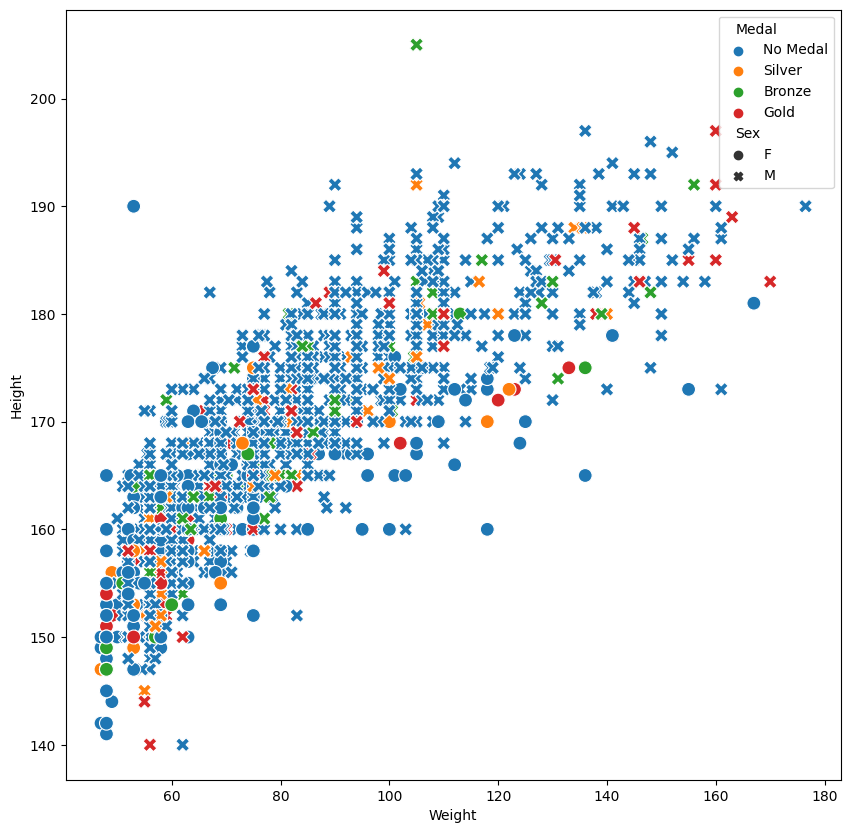

In [61]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport']=='Weightlifting']
sns.scatterplot(x=temp_df['Weight'],y=temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)